In [57]:
import numpy as np
from matplotlib import pyplot as plt
import math

In [58]:
n = 80
mu = 0
sigma = 5
#создадим выборку
sample = np.random.normal(loc=mu, scale=sigma, size=n)
print(sample)


[-4.59950574e+00 -1.53917055e+00  1.83858284e+00  1.26968175e+00
  1.95050472e+00  7.91811378e+00 -5.59282983e+00 -1.69254143e+00
  2.41121489e+00  7.94788665e+00 -4.38657821e+00 -5.80878145e-01
  2.60250378e+00 -3.69794550e+00 -9.57496266e-01  1.07492345e-01
  1.96974201e+00  1.69268729e+00  2.65313780e+00 -4.06147162e+00
  2.40601280e+00 -7.13940575e-01 -8.32658484e-01 -3.48510195e+00
  1.55250951e+00  3.46335881e+00  1.38326061e+00 -5.72880483e+00
  1.37257161e+00 -4.23680040e+00  7.66661958e+00 -6.08170874e+00
  1.01580938e+00 -6.01691648e+00 -1.25693702e+01  2.14506519e+00
 -9.32240891e+00  3.21807468e-01  1.08329925e+01  5.38557670e+00
  4.28092344e+00 -8.31118287e+00 -2.66414808e+00  7.18281302e+00
  1.65390017e+00 -1.49645179e+00  1.22387586e+00  4.18849309e+00
 -1.26054482e+00  5.77197940e-01  4.36236974e+00 -2.53283236e-01
 -4.81483521e+00  4.49903251e+00 -3.33357809e+00 -8.76817250e-01
  1.03097198e+01 -1.35896820e+00  6.35055118e+00  8.48512261e-01
 -6.16910828e+00 -4.24846

In [59]:
# вычислим число интервалов группировки по правилу Стерджеса
num_bins = int(np.log2(n) + 1)
num_bins

7

[ 3 10 16 29 11  7  4]
[-12.56937016  -8.8303818   -5.09139345  -1.3524051    2.38658325
   6.1255716    9.86455995  13.6035483 ]
Интервальный ряд абсолютных частот:
Интервал -12.569370155781083 - -8.830381804778675: 3
Интервал -8.830381804778675 - -5.091393453776268: 10
Интервал -5.091393453776268 - -1.3524051027738615: 16
Интервал -1.3524051027738615 - 2.386583248228547: 29
Интервал 2.386583248228547 - 6.125571599230955: 11
Интервал 6.125571599230955 - 9.86455995023336: 7
Интервал 9.86455995023336 - 13.603548301235769: 4


(array([ 3., 10., 16., 29., 11.,  7.,  4.]),
 array([-12.56937016,  -8.8303818 ,  -5.09139345,  -1.3524051 ,
          2.38658325,   6.1255716 ,   9.86455995,  13.6035483 ]),
 <BarContainer object of 7 artists>)

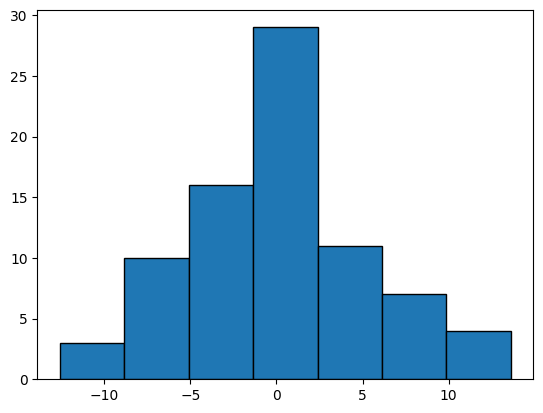

In [60]:
# вычислим интервальный ряд абсолютных частот
# hist - кол-во значений выборки в каждом интервале
# bin_edges -  граничные значения интервалов
hist, bin_edges = np.histogram(sample, bins=num_bins)
print(hist)
print(bin_edges)
print('Интервальный ряд абсолютных частот:')
for i in range(len(hist)):
    print(f'Интервал {bin_edges[i]} - {bin_edges[i+1]}: {hist[i]}')
plt.hist(sample, bins=bin_edges, edgecolor='black')

In [61]:
# Вычисляем сумму абсолютных частот
total_freq = np.sum(hist)
print('Сумма абсолютных частот:', total_freq)

Сумма абсолютных частот: 80


In [62]:
#найдем интервальный ряд относительных частот
h=(math.ceil(sample.max())-math.floor(sample.min()))/num_bins
print(h)
relative_freq = hist/(h*n)
for i in range(0, len(relative_freq)):
    print(f'{i+1} interval: {relative_freq[i]}')

print(relative_freq.sum()*h)

3.857142857142857
1 interval: 0.009722222222222222
2 interval: 0.03240740740740741
3 interval: 0.05185185185185186
4 interval: 0.09398148148148149
5 interval: 0.03564814814814815
6 interval: 0.022685185185185187
7 interval: 0.012962962962962964
1.0000000000000002


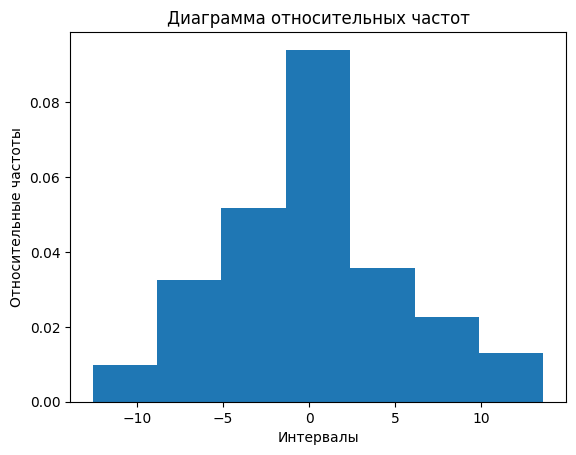

In [63]:

plt.title("Диаграма относительных частот")
plt.stairs(relative_freq, bin_edges, fill=True)

plt.xlabel('Интервалы')
plt.ylabel('Относительные частоты')
plt.title('Диаграмма относительных частот')
plt.show()


(array([0.01002945, 0.0334315 , 0.0534904 , 0.09695136, 0.03677465,
        0.02340205, 0.0133726 ]),
 array([-12.56937016,  -8.8303818 ,  -5.09139345,  -1.3524051 ,
          2.38658325,   6.1255716 ,   9.86455995,  13.6035483 ]),
 <BarContainer object of 7 artists>)

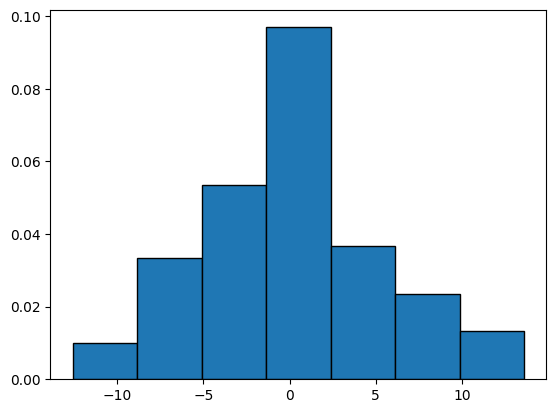

In [64]:
plt.hist(sample, bins=bin_edges, density=True, edgecolor='black')


Часть первая, вторые задания

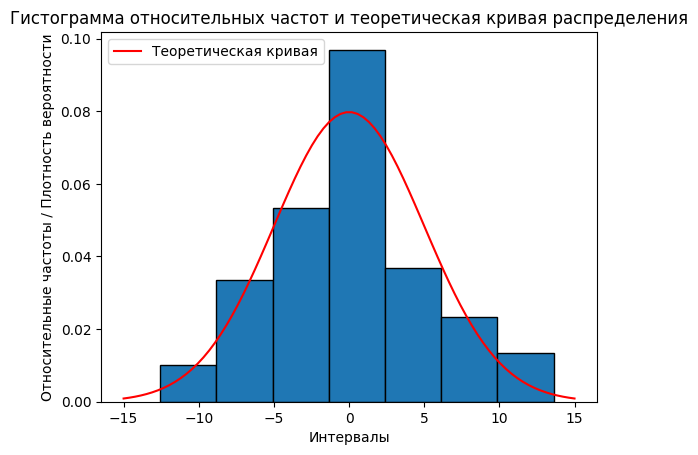

In [65]:
# Строим гистограмму относительных частот
plt.hist(sample, bins=bin_edges, density=True, edgecolor='black')

# Находим значения x в интервале (a-3дельта, a+3дельта) в кол-ве n шт
x = np.linspace(mu - 3*sigma, mu + 3*sigma, n)
#находим значение плотностей в точках x
y = (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-(x-mu)**2 / (2*sigma**2)) 
#строим теоретическую кривую распределения
plt.plot(x, y, color='red', label='Теоретическая кривая')
plt.xlabel('Интервалы')
plt.ylabel('Относительные частоты / Плотность вероятности')
plt.title('Гистограмма относительных частот и теоретическая кривая распределения')
plt.legend()
plt.show()

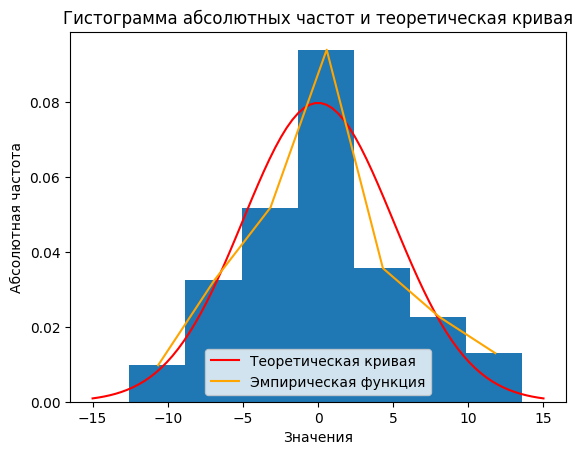

In [66]:
import scipy.stats as sts
# Строим гистограмму относительных частот
plt.stairs(relative_freq, bin_edges, fill=True)

# Строим график теоретической ф-ии распределения
x = np.linspace(mu - 3*sigma, mu + 3*sigma, n)
y = (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-(x-mu)**2 / (2*sigma**2)) 
plt.plot(x, y,  color="red", label='Теоретическая кривая')

# строим график эмпирической ф-ии распределения
y2 = []
for i in relative_freq:
        y2.append(i)
x2 = []
for i in range(0, num_bins):
    x2.append(bin_edges[i]+(h/2))
plt.plot(x2, y2, color="orange", label='Эмпирическая функция')


plt.xlabel('Значения')
plt.ylabel('Абсолютная частота')
plt.title('Гистограмма абсолютных частот и теоретическая кривая')
plt.legend()
plt.show()
plt.show()


In [67]:
square_sum = 0
for i in hist/n/h:
    square_sum+=i*h
print("Сумма площадей под графиком: ", square_sum)


Сумма площадей под графиком:  1.0


,X
0.25,-3.756363
0.50,0.214650
0.75,2.459037


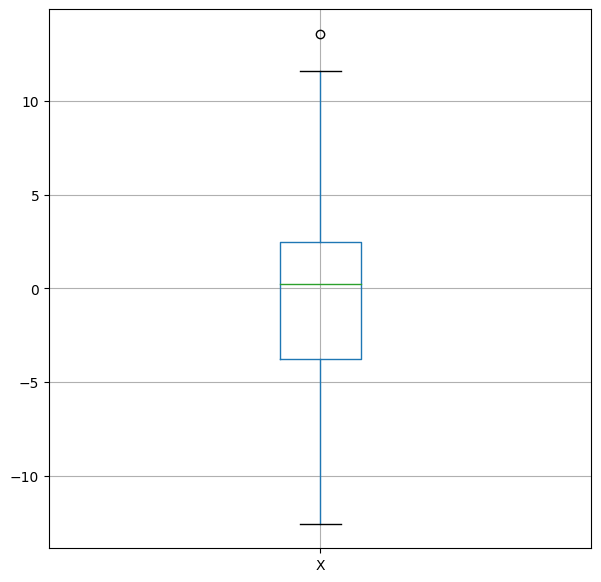

In [68]:
import pandas as pd
data_frame = pd.DataFrame(data=sample,columns=['X'])
data_frame.boxplot(figsize = (7, 7))
data_frame.quantile([0.25,0.5,0.75])

In [69]:
print(np.sort(sample))
#Согласно правилу 3-х сигм, при нормальном распределении около 99.7% значений находятся в пределах трех стандартных отклонений от среднего значения
#при увеличении размера выборки ожидаемое число выбросов будет увеличиваться
print(mu-3*sigma, mu+3*sigma)
# Бокс-плот состоит из прямоугольника (ящика), вертикальных линий (усов) и точек (выбросов).
# Верхняя и нижняя границы ящика соответствуют первому и третьему квартилям соответственно, а горизонтальная линия внутри ящика обозначает медиану.
# Усы выходят за пределы ящика и обычно определяются как 1,5 межквартильного размаха (разница между первым и третьим квартилями).
# Выбросами считаются точки, находящиеся за пределами усов.

[-1.25693702e+01 -9.32240891e+00 -9.05048002e+00 -8.79200933e+00
 -8.31118287e+00 -7.75353007e+00 -6.16910828e+00 -6.08170874e+00
 -6.01691648e+00 -5.72880483e+00 -5.59282983e+00 -5.36471181e+00
 -5.19187684e+00 -4.81483521e+00 -4.59950574e+00 -4.38657821e+00
 -4.24846974e+00 -4.23680040e+00 -4.06147162e+00 -3.93161576e+00
 -3.69794550e+00 -3.48510195e+00 -3.33357809e+00 -2.66414808e+00
 -2.41649602e+00 -1.69254143e+00 -1.53917055e+00 -1.49645179e+00
 -1.35896820e+00 -1.32765008e+00 -1.26054482e+00 -1.20227361e+00
 -9.57496266e-01 -8.76817250e-01 -8.32658484e-01 -7.13940575e-01
 -5.80878145e-01 -2.53283236e-01  9.72112060e-03  1.07492345e-01
  3.21807468e-01  5.77197940e-01  8.48512261e-01  1.01580938e+00
  1.22387586e+00  1.26968175e+00  1.37257161e+00  1.38326061e+00
  1.55250951e+00  1.56442270e+00  1.65390017e+00  1.67210337e+00
  1.69268729e+00  1.83858284e+00  1.95050472e+00  1.96974201e+00
  1.98846204e+00  2.14506519e+00  2.40601280e+00  2.41121489e+00
  2.60250378e+00  2.65313

Часть первая, третьи задания

In [70]:
#вычисление "вручную"
q = 1.55
# Находим по таблице значение x = 1.55 и по св-ву интегралов суммируем его самим с собой
print("Вероятность, сделанная \"вручную\": ", 0.4394*2)
#вычисление с помощью питона
print("Вероятность по lib", sts.norm().cdf(q)-sts.norm().cdf(-q))

#оценка вероятности *
satisfying_values = 0
#найдем все значения выборки, подходящие по усл-ю
for i in sample:
    if abs(i-mu) < q*sigma:
        satisfying_values+=1
#найдем отн. частоту
rel_freq = satisfying_values / n
print("Статистическая", rel_freq)
#увеличив выборку в 50 раз, точность оценки вероятности увеличится, потому что гистограмма более совпадает с теоретической кривой(в силу збч)


Вероятность, сделанная "вручную":  0.8788
Вероятность по lib 0.878858483995882
Статистическая 0.8375


Часть первая, четвертые задания

In [71]:
#первый способ
a_empirical = sample.sum()/n
print("Эмперический начальный момент", a_empirical)
var_empirical = 0
for i in sample: 
    var_empirical += math.pow(i-a_empirical, 2)
var_empirical /= n
print("Эмпирический второй центральный момент(диспресия):", var_empirical)
print("Стандартное отклонение", math.sqrt(var_empirical))

sum = 0
for i in sample: 
    sum += math.pow(i-a_empirical,3)
m3 = sum/n
A = m3/math.pow(math.sqrt(var_empirical),2)
print("Коэффициент ассимметрии", A)

sum = 0
for i in sample:
    sum+=math.pow((i-a_empirical), 4)
m4 = sum/n
E = m4/math.pow(var_empirical, 2) - 3
print("Коэффициент эксцесса", E)


Эмперический начальный момент 0.13888353051584268
Эмпирический второй центральный момент(диспресия): 26.576702356556105
Стандартное отклонение 5.155259678867409
Коэффициент ассимметрии 1.0600191154786356
Коэффициент эксцесса 0.008210885993434669


In [72]:
#второй способ
import statistics
#мат ожидание
mean = statistics.mean(sample)
print("mean ", mean)
#дисперсия
variacne = statistics.variance(sample)
print("variance", variacne)
#стандартное отклонение
deviation = math.sqrt(variacne)
print("deviation", deviation)
#Коэффициент асимметрии (skewness)
skewness = sts.skew(sample)
print("skewness", skewness)
#Эксцесс
kurtosis = sts.kurtosis(sample)
print("kurtosis", kurtosis)

mean  0.13888353051584265
variance 26.913116310436564
deviation 5.187785299184669
skewness 0.2056189564657425
kurtosis 0.008210885993435557


In [73]:
n = 4000
sample = np.random.normal(loc=mu, scale=sigma, size=n)
#мат ожидание
mean = statistics.mean(sample)
print("mean ", mean)
#дисперсия
variacne = statistics.variance(sample)
print("variance", variacne)
#стандартное отклонение
deviation = math.sqrt(variacne)
print("deviation", deviation)
#Коэффициент асимметрии (skewness)
skewness = sts.skew(sample)
print("skewness", skewness)
#Эксцесс
kurtosis = sts.kurtosis(sample)
print("kurtosis", kurtosis)

#при увелечении выборки в 50 раз оценки пармаметров (мо и дисп) стали более точными

mean  0.008471232736827082
variance 24.849956252304526
deviation 4.984973044290664
skewness 0.04385507395930004
kurtosis -0.03197930086907075
